In [1]:
import neo
import quantities as pq
import matplotlib.pyplot as plt

## Load lone .ntt file

In [29]:
reader = neo.io.NeuralynxIO(dirname='C:/Users/mvdm/Dropbox (Dartmouth College)/projects/DANDI/042020/loading_test_a')
reader.parse_header()
print(reader)

NeuralynxIO: C:/Users/mvdm/Dropbox (Dartmouth College)/projects/DANDI/042020/loading_test_a
nb_block: 1
nb_segment:  [1]
signal_channels: []
unit_channels: [chTT13#16#0, chTT13#17#0, chTT13#18#0, chTT13#19#0]
event_channels: []



In [30]:
block = reader.read_block()
seg = block.segments[0]
unit_signal = seg.spiketrains[0]

#type(unit_signal.times[0])
print(unit_signal.times[0]) # how to print more significant digits for a Quantities object?
#unit_signal.__dict__

0.0 s


## Load same .ntt file with other files present in folder. Note the first timestamp for the same channel is now different:

In [31]:
reader = neo.io.NeuralynxIO(dirname='C:/Users/mvdm/Dropbox (Dartmouth College)/projects/DANDI/042020/loading_test_b')
reader.parse_header()
print(reader)

NeuralynxIO: C:/Users/mvdm/Dropbox (Dartmouth College)/projects/DANDI/042020/loading_test_b
nb_block: 1
nb_segment:  [1]
signal_channels: [CSC50]
unit_channels: [chTT13#16#0, chTT13#17#0, chTT13#18#0, chTT13#19#0]
event_channels: [Events event_id=11 ttl=0]



In [32]:
block = reader.read_block()
seg = block.segments[0]
unit_signal = seg.spiketrains[0]

#type(unit_signal.times[0])
print(unit_signal.times[0]) # how to print more significant digits for a Quantities object?
#unit_signal.__dict__

0.12228099999992992 s


## some plotting

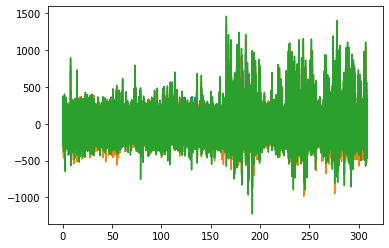

In [8]:
block = reader.read_block();
seg = block.segments[0]
analogsignal = seg.analogsignals[0]
plt.plot(analogsignal.times, analogsignal.magnitude)
plt.show()

In [9]:
analogsignal.times[0]

array(0.) * s

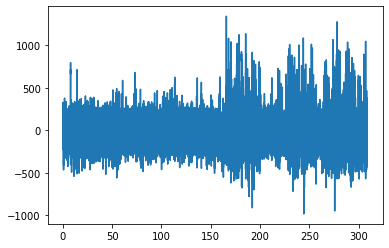

In [4]:
# access only one channel within loaded data
plt.plot(analogsignal.times, analogsignal.magnitude[:, 1])
plt.show()

In [5]:
block

Block with 1 segments, 5 channel_indexes
file_origin: 'R050-2014-03-28_32ktest_small'
# segments (N=1)
0: Segment with 1 analogsignals, 1 events, 4 spiketrains
   # analogsignals (N=1)
   0: AnalogSignal with 3 channels of length 9880576; units uV; datatype float32 
      name: 'Channel bundle (CSC50,CSC51,CSC52) '
      sampling rate: 32000.0 Hz
      time: 0.0 s to 308.768 s

In [7]:
import os
import sys
import numpy as np
import nept
import matplotlib.pyplot as plt

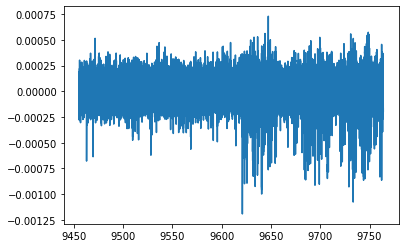

In [8]:
# load data
lfp = nept.load_lfp('R050-2014-03-28_32ktest_small\R050-2014-03-28-CSC50.ncs')

plt.plot(lfp.time, lfp.data)
plt.show()

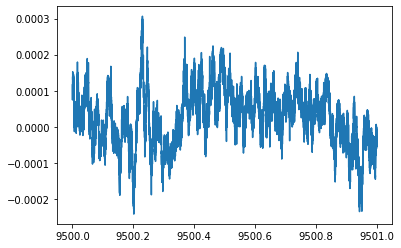

In [12]:
# Slice the LFP to our time of interest
start = 9500
stop = 9501
sliced_lfp = lfp.time_slice(start, stop)

# Plot the sliced LFP
plt.plot(sliced_lfp.time, sliced_lfp.data)
plt.show()

In [14]:
dir(lfp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'dimensions',
 'isempty',
 'n_samples',
 'time',
 'time_slice']